### HW6 - Data science <br>
### Kiarash Gheisari Pour 402102302


In this assignment we'll be using a dataset on california housing , and try to come up with a model to approximate the prices.

first off let's upload our dataset and take a look at the data.

In [5]:
import pandas as pd

columns = [
    'MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population',
    'AveOccup', 'Latitude', 'Longitude', 'MedHouseValue'
]

df = pd.read_csv("cal_housing.data", header=None, names=columns)

df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseValue
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0


In [10]:
df.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseValue
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.898014,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.247906,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,295.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


we'll do a pair plot to get a feel for the data and see if we can get anything useful out of it (say for our kernel regression)

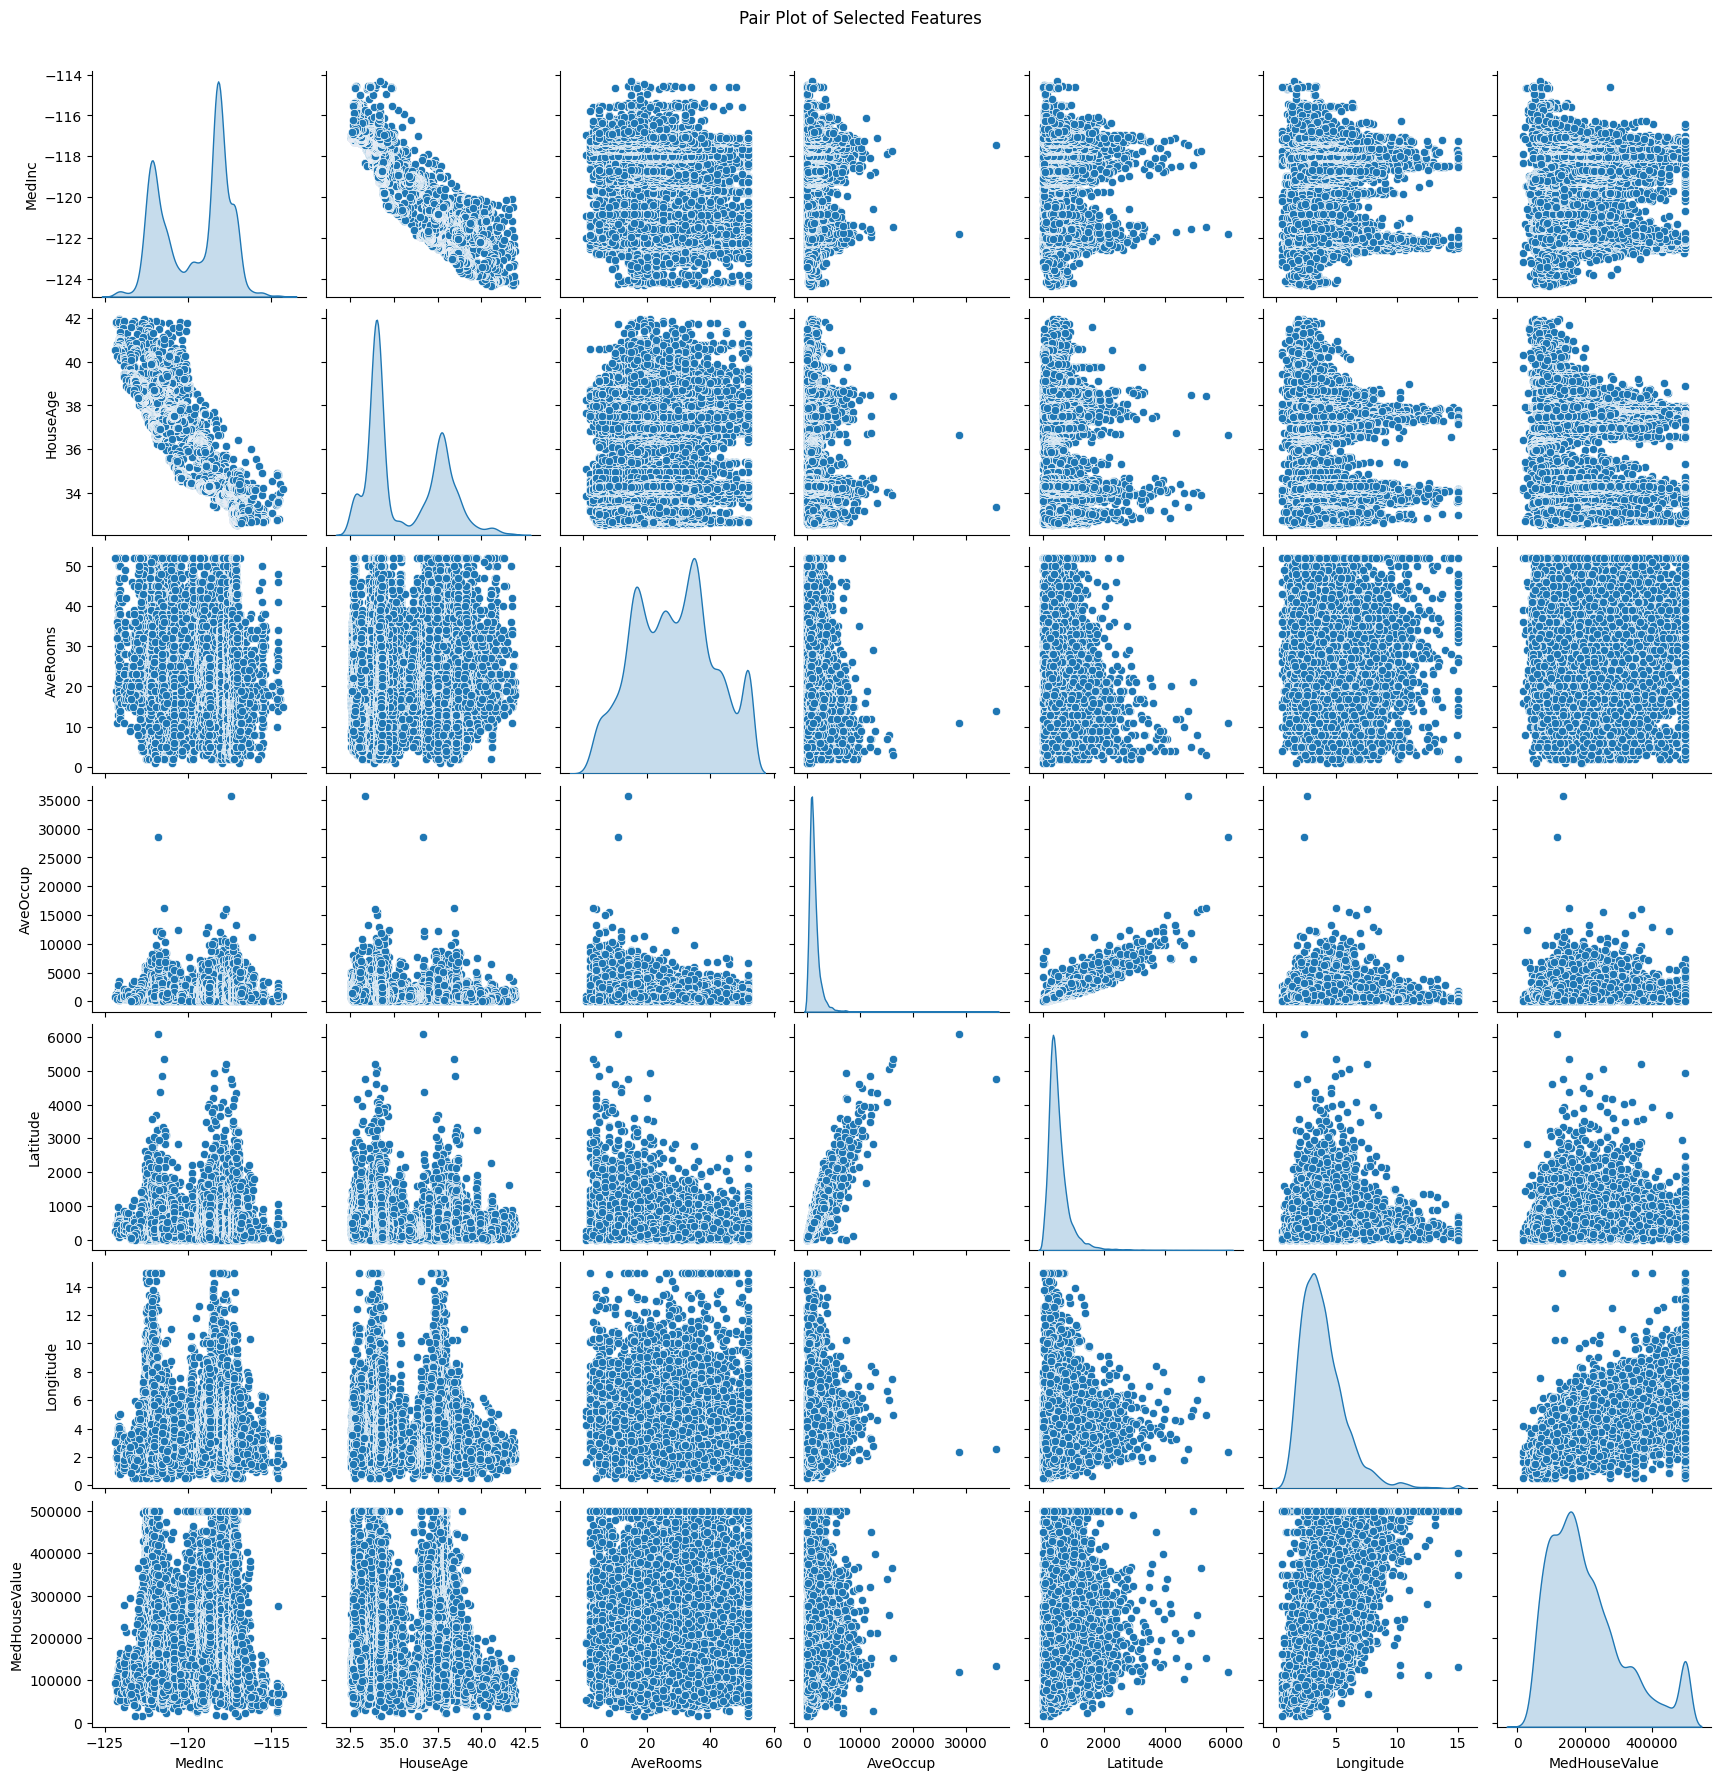

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

selected_features = ['MedInc', 'HouseAge', 'AveRooms', 'AveOccup','Latitude', 'Longitude' ,'MedHouseValue']
sns.pairplot(df[selected_features], diag_kind='kde')

plt.suptitle("Pair Plot of Selected Features", y=1.02)
plt.show()


let's begin the Regression Analysis!

we'll remove our target column

In [14]:
house_prices = df.pop('MedHouseValue')

In [18]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

regression_df = scaler.fit_transform(df)
regression_df

array([[-1.32783522,  1.05254828,  0.98214266, ..., -0.9744286 ,
        -0.97703285,  2.34476576],
       [-1.32284391,  1.04318455, -0.60701891, ...,  0.86143887,
         1.66996103,  2.33223796],
       [-1.33282653,  1.03850269,  1.85618152, ..., -0.82077735,
        -0.84363692,  1.7826994 ],
       ...,
       [-0.8237132 ,  1.77823747, -0.92485123, ..., -0.3695372 ,
        -0.17404163, -1.14259331],
       [-0.87362627,  1.77823747, -0.84539315, ..., -0.60442933,
        -0.39375258, -1.05458292],
       [-0.83369581,  1.75014627, -1.00430931, ..., -0.03397701,
         0.07967221, -0.78012947]])

let's split our dataset into two parts.

In [33]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(regression_df,house_prices,test_size=0.5)

now we'll apply a simple linear regression on our data

In [34]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train , y_train)

LinearRegression()

let's predict and calculate the R2 score of our prediction.

In [35]:
predicted_prices = model.predict(X_test)

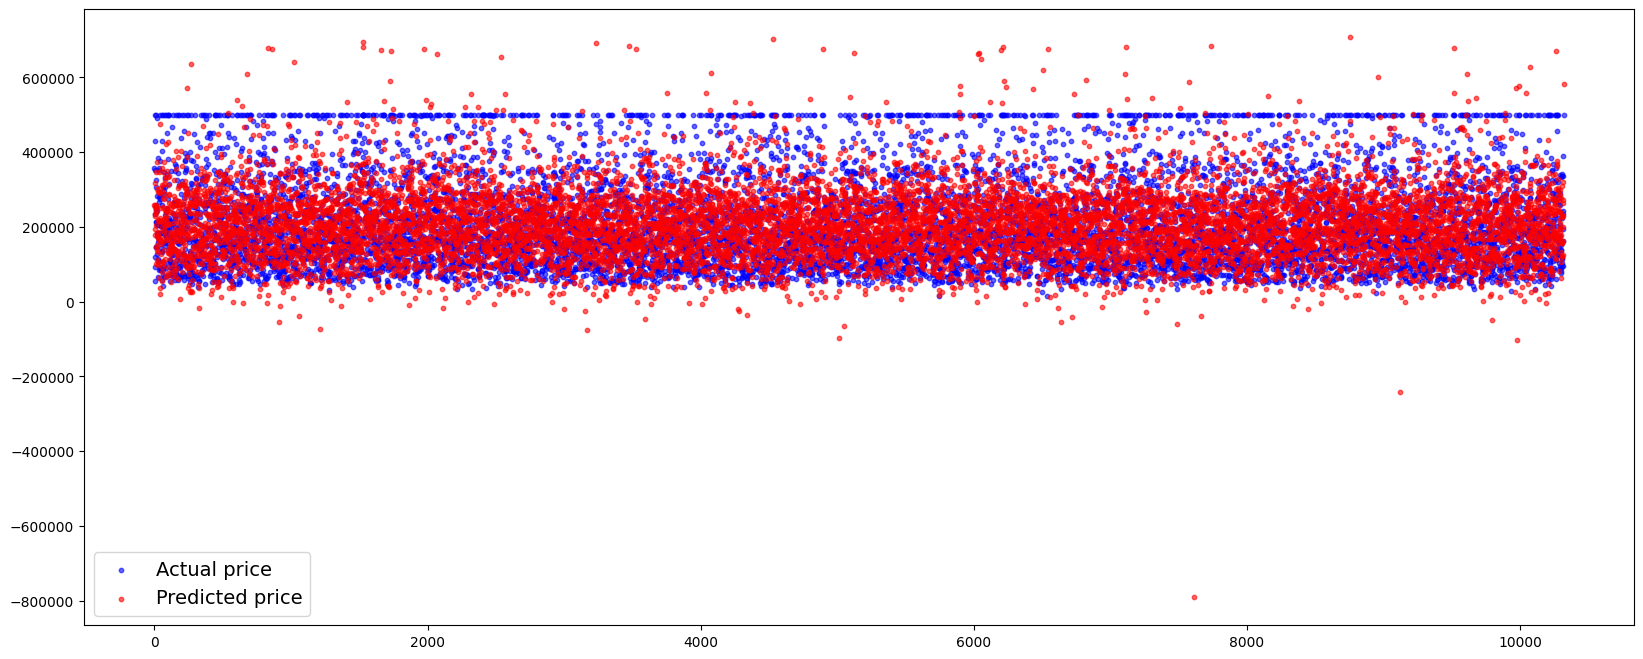

In [36]:
import numpy as np

plt.figure(figsize=(20,8))
x = np.arange(0,len(y_test),1)
plt.scatter(x,y_test,c='b',s=10,alpha=0.6)
plt.scatter(x,predicted_prices,c='r',s=10,alpha=0.6)
plt.legend(['Actual price','Predicted price'],fontsize=14)
plt.show()

what we see here is that sometimes our model prediction goes terribly wrong , thats why we should "cap" our prediction.

In [37]:
def cap_vector(input_vec,max_val,min_val):
  output_vec = np.maximum(min_val,input_vec) 
  output_vec = np.minimum(max_val,output_vec)

  return output_vec

In [38]:
predicted_prices  = cap_vector(predicted_prices , 500000 , 15000)

In [39]:
from sklearn.metrics import r2_score

R2_score = r2_score(y_test , y_pred = predicted_prices)
print("our R2 score is %f" %R2_score)

our R2 score is 0.659375


not a very desirable score , let's do some feature engineering and try to fix that.

In [63]:
df['InvHouseAgeSquared'] = 1 / (df['HouseAge'])
df['long2'] = df['Longitude']**1.3

regression_df = scaler.fit_transform(df)
X_train, X_test, y_train, y_test = train_test_split(regression_df,house_prices,test_size=0.5)

model = LinearRegression()
model.fit(X_train , y_train)
predicted_prices = model.predict(X_test)
predicted_prices  = cap_vector(predicted_prices , 500000 , 15000)

R2_score = r2_score(y_test , y_pred = predicted_prices)
print("our R2 score is %f" %R2_score)

our R2 score is 0.646145


still no good , let's do another trick.<br>
in the pairplot that we did earlier , it's visible that the relation that the relation between house age and value is made up of two clusters with a border of about 36 years. let's split our data and see if anything intresting happens.

In [75]:
df2 = pd.read_csv("cal_housing.data", header=None, names=columns)

df2 = df2[df2['HouseAge'] > 36.5]
house_prices2 = df2.pop('MedHouseValue')
regression_df = scaler.fit_transform(df2)
X_train, X_test, y_train, y_test = train_test_split(regression_df,house_prices2,test_size=0.5)

model = LinearRegression()
model.fit(X_train , y_train)
predicted_prices = model.predict(X_test)
predicted_prices  = cap_vector(predicted_prices , 500000 , 15000)

R2_score = r2_score(y_test , y_pred = predicted_prices)
print("our R2 score is %f" %R2_score)

our R2 score is 0.708390


loot at that! Something intresting happend.

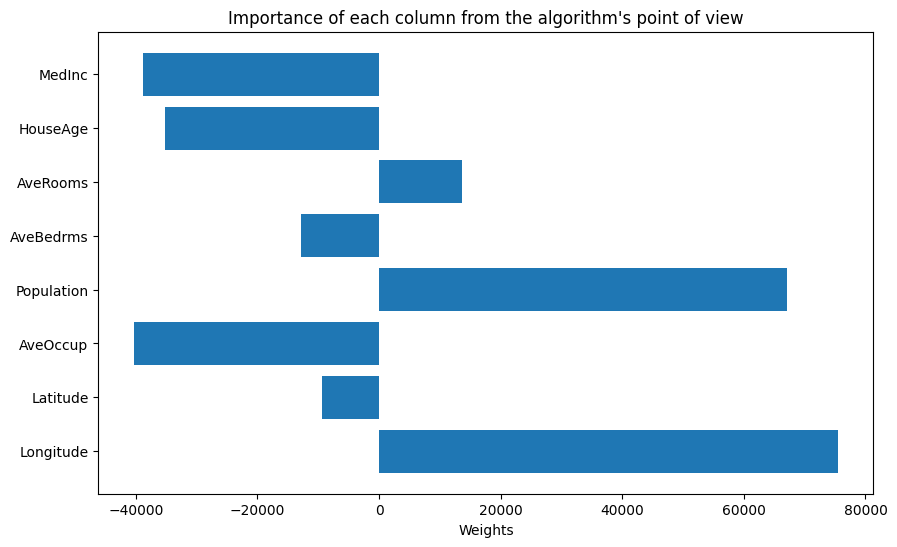

In [77]:
weights_linear = model.coef_
fig, ax = plt.subplots(figsize=(10,6))
y_pos = np.arange(0,len(weights_linear),1)
labels = list(df2.columns)

hbars = ax.barh(y_pos, weights_linear, align='center')
ax.set_yticks(y_pos)
ax.set_yticklabels(labels)
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel('Weights')
ax.set_title("Importance of each column from the algorithm's point of view")

plt.show()

now for kernel regression , let's do a polynomial regression.

In [79]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=3)
X_train_transformed_poly = poly.fit_transform(X_train)
X_test_transformed_poly = poly.transform(X_test)

print(X_train_transformed_poly.shape)

(4235, 165)


we have a bit too much features , let's do a bit o feature selection to extract the important ones.

In [80]:
from sklearn.feature_selection import SelectKBest, mutual_info_regression
feature_selector = SelectKBest(score_func=mutual_info_regression, k = 'all').fit(X_train_transformed_poly,y_train)

Text(0, 0.5, 'Cumulative percetnage of feature scores')

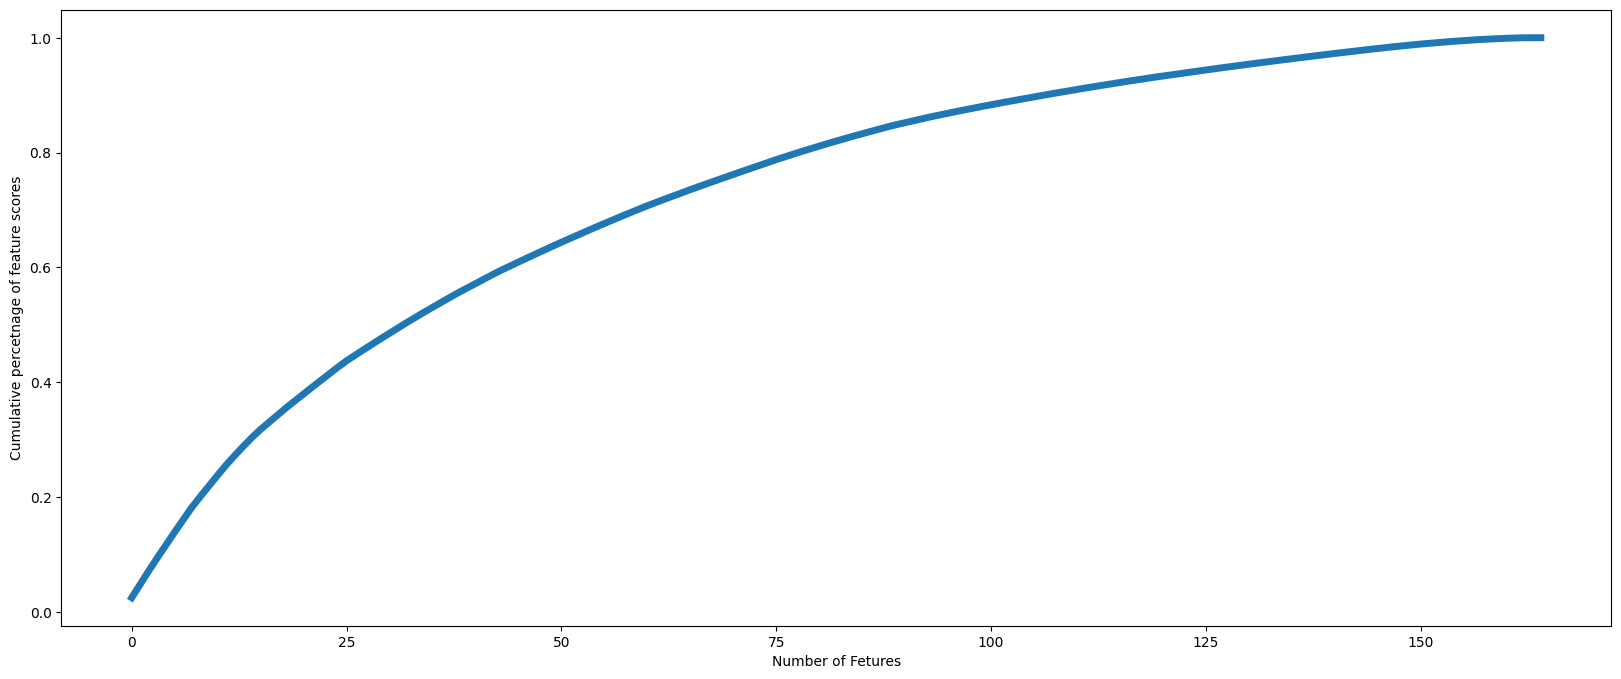

In [81]:
feature_scores = feature_selector.scores_
plt.figure(figsize=(20,8))
plt.plot(np.cumsum(np.sort(np.abs(feature_scores))[::-1])/sum(np.abs(feature_scores)),lw=5)
plt.xlabel('Number of Fetures')
plt.ylabel('Cumulative percetnage of feature scores')

there's no visible "good" cutoff in the number of features , let's do an iteration to see whats good!

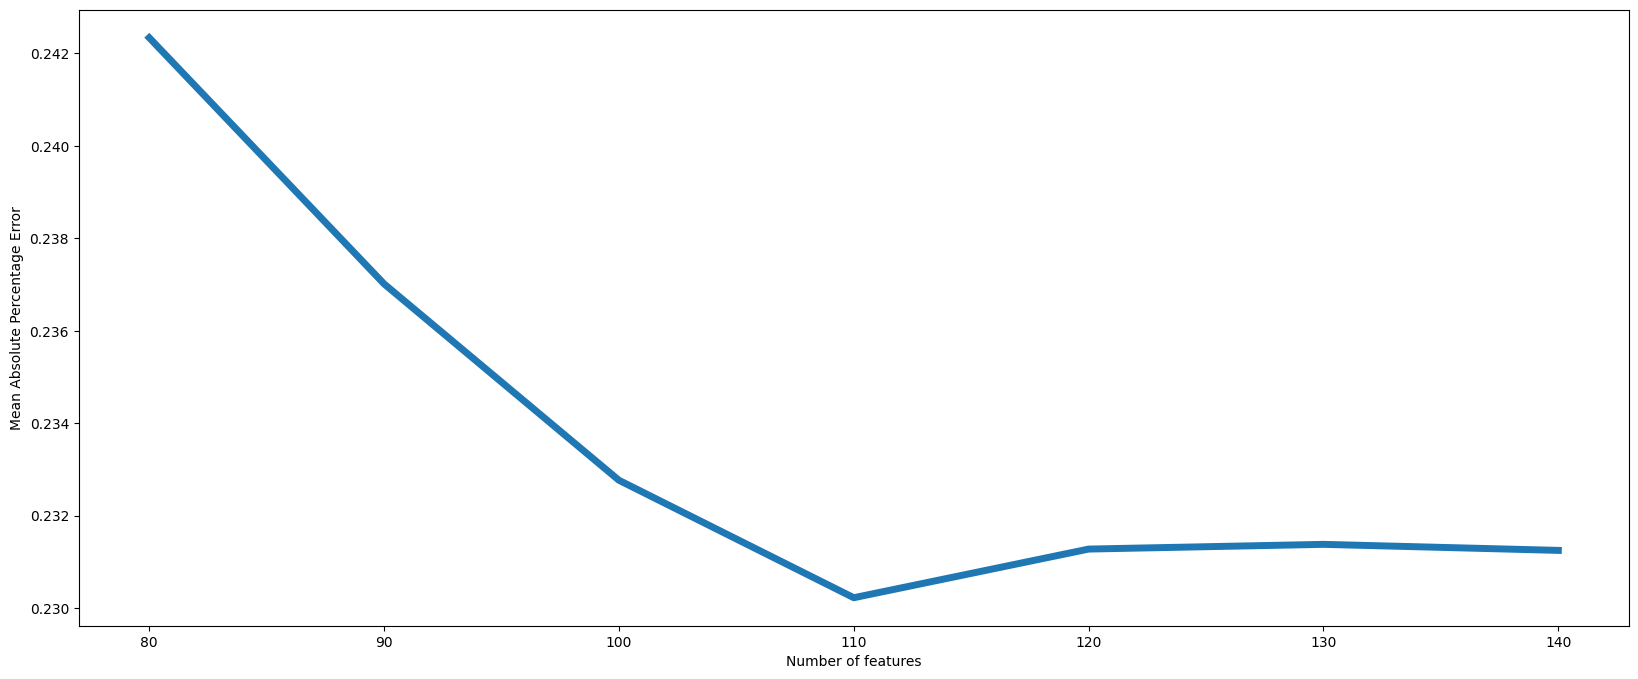

In [84]:
from sklearn.metrics import mean_absolute_percentage_error
no_features = []
scores = []
iterations = []
for k in range(7):
    iterations.append(80 + 10*k)

for k in iterations:

    # Select best features
    selector = SelectKBest(mutual_info_regression, k = k)
    selector.fit(X_train_transformed_poly, y_train)
    X_train_transformed = selector.transform(X_train_transformed_poly)
    X_test_transform = selector.transform(X_test_transformed_poly)

    # Create the model
    model = LinearRegression()
    model.fit(X_train_transformed, y_train)
    no_features.append(k)
    predicted_prices_test = cap_vector(model.predict(X_test_transform),500000,15000)
    MAPE_test = mean_absolute_percentage_error(y_test, predicted_prices_test)
    scores.append(MAPE_test)


# Plot the results
plt.figure(figsize=(20,8))
plt.plot(no_features,scores,lw=5)
plt.xlabel('Number of features')
plt.ylabel('Mean Absolute Percentage Error')
plt.show()

110 seems good

In [85]:
selector = SelectKBest(mutual_info_regression, k = 110)
selector.fit(X_train_transformed_poly, y_train)
X_train_transformed = selector.transform(X_train_transformed_poly)
X_test_transform = selector.transform(X_test_transformed_poly)

model = LinearRegression()
model.fit(X_train_transformed, y_train)
no_features.append(k)
predicted_prices = cap_vector(model.predict(X_test_transform),500000,15000)
R2_score = r2_score(y_test , y_pred= predicted_prices)

In [86]:
R2_score

0.7895254900106168

Much better!

In [99]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(penalty=None,max_iter=250)
model.fit(X_train, y_train)

c:\Users\darkoob\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=250, penalty=None)

In [ ]:
predicted_prices_train = model.predict(X_train)
predicted_prices_test = model.predict(X_test)
R2_score_test = r2_score(y_test , y_pred=predicted_prices_test)
R2_score_train = r2_score(y_true=y_train , y_pred=predicted_prices_train)
print("Train score: %f Test score: %f" % (R2_score_train, R2_score_test))

Train score: 0.709747 Test score: 0.615092


let's try out Ridge regression

In [101]:
from sklearn.linear_model import Ridge
model = Ridge(alpha=0.1)
model.fit(X_train , y_train)

Ridge(alpha=0.1)

In [102]:
predicted_prices_train = model.predict(X_train)
predicted_prices_test = model.predict(X_test)

R2_score_test = r2_score(y_test , y_pred=predicted_prices_test)
R2_score_train = r2_score(y_true=y_train , y_pred=predicted_prices_train)
print("Train score: %f Test score: %f" % (R2_score_train, R2_score_test))

Train score: 0.692134 Test score: 0.691681


let's see if we can get anything better by adjusting the alpha parameter.


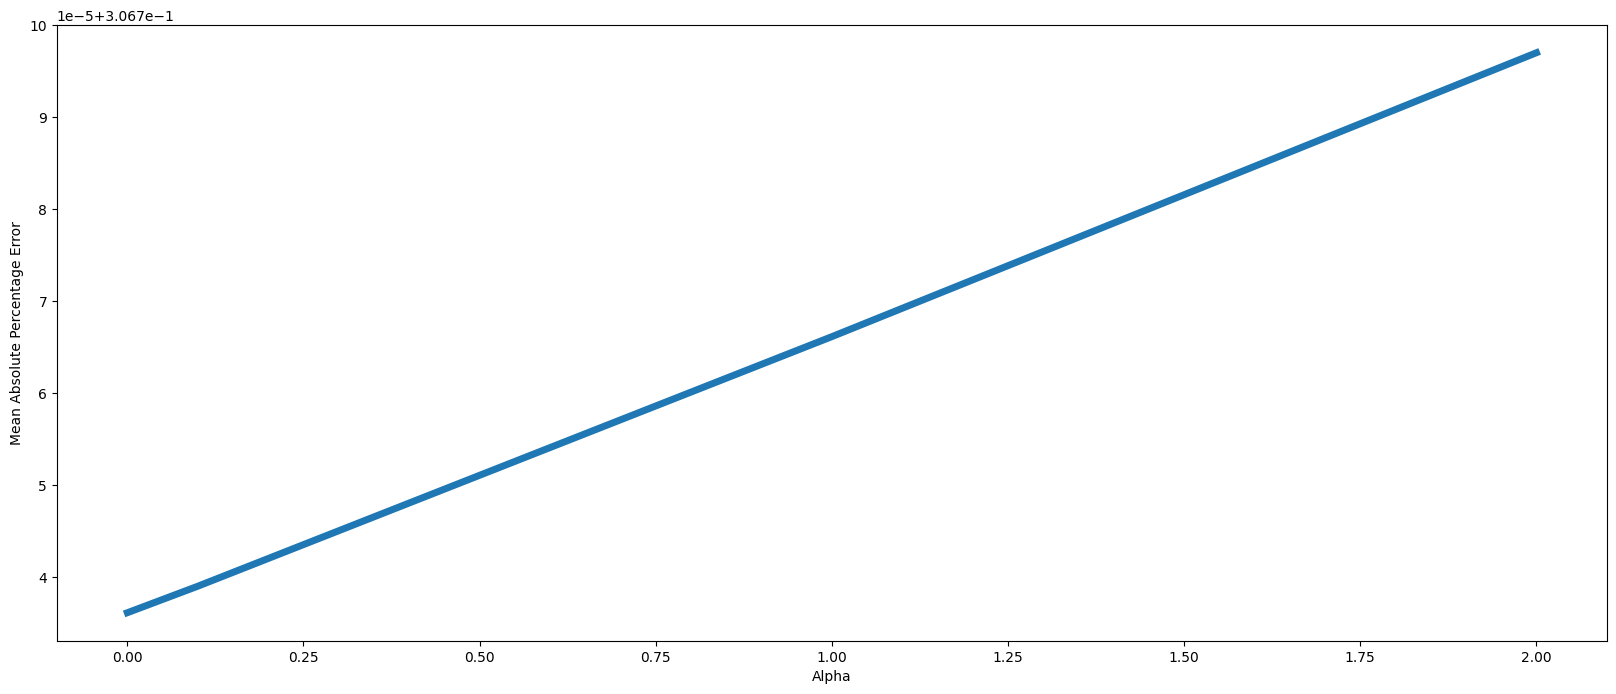

In [103]:
alpha_list = [0.000001,.0001,.0005,.001,.005,0.01,.1,1,2]
scores = []
for alpha in alpha_list:
  model = Ridge(alpha=alpha)
  model.fit(X_train, y_train)
  predicted_prices_test = model.predict(X_test)
  MAPE_test = mean_absolute_percentage_error(y_test, predicted_prices_test)
  scores.append(MAPE_test)

# Plot the results
plt.figure(figsize=(20,8))
plt.plot(alpha_list,scores,lw=5)
plt.xlabel('Alpha')
plt.ylabel('Mean Absolute Percentage Error')
plt.show()

seems like doing Ridge regression isn't doing us much good , probably because the number of our features aren't that high to make our model prone to overfitting.

let's test it out for the polynomial regression that we had , which has much more features which makes it more prone to overfitting.

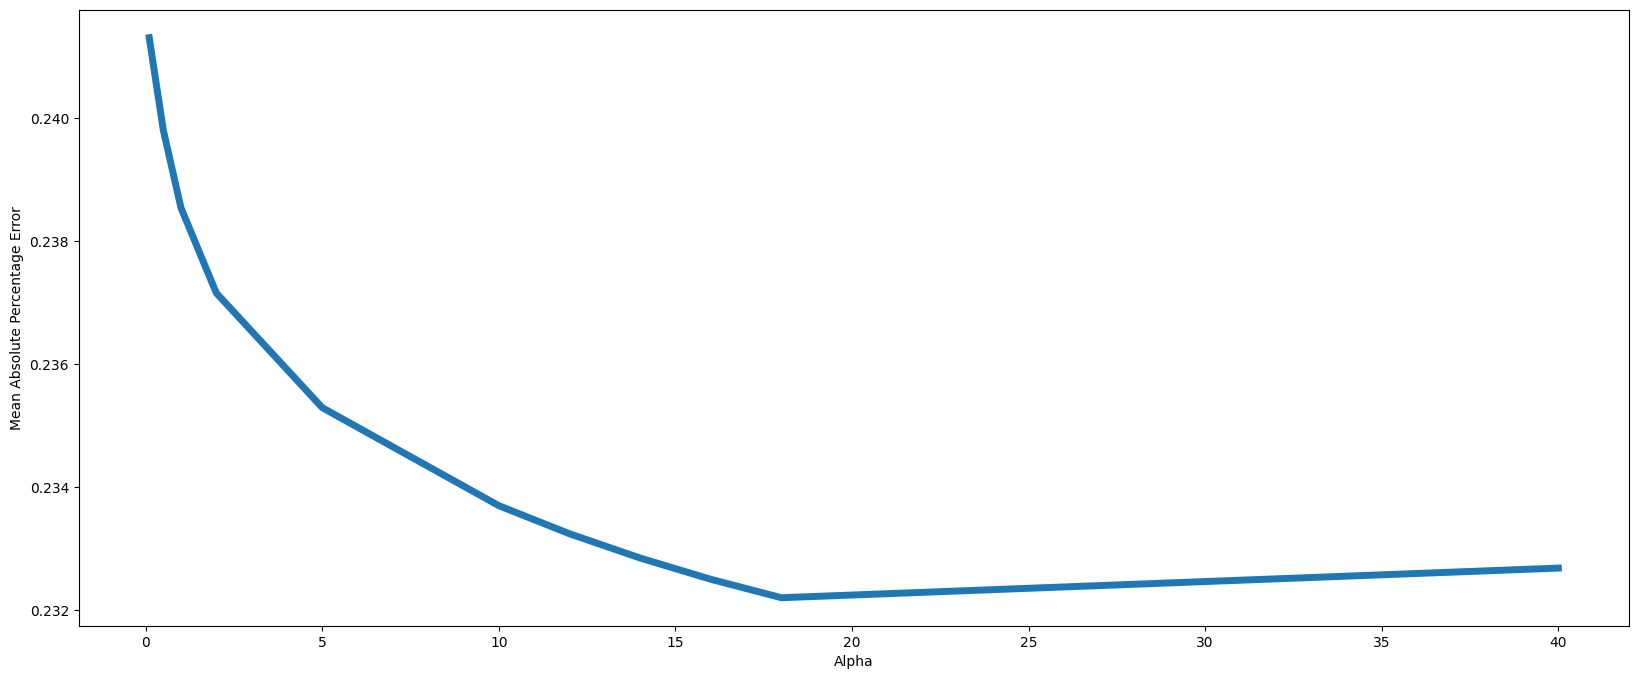

In [106]:
no_features = []
scores = []
# Select best features
selector = SelectKBest(mutual_info_regression, k = 100)
selector.fit(X_train_transformed_poly, y_train)
X_train_transformed = selector.transform(X_train_transformed_poly)
X_test_transform = selector.transform(X_test_transformed_poly)

alpha_list = [.1,0.5,1,2,5,10, 12 , 14 , 16 , 18,40]
scores = []
for alpha in alpha_list:

    # Create the model
    model = Ridge(alpha=alpha)
    model.fit(X_train_transformed, y_train)
    no_features.append(k)
    predicted_prices_test = model.predict(X_test_transform)
    MAPE_test = mean_absolute_percentage_error(y_test, predicted_prices_test)
    scores.append(MAPE_test)

# Plot the results
plt.figure(figsize=(20,8))
plt.plot(alpha_list,scores,lw=5)
plt.xlabel('Alpha')
plt.ylabel('Mean Absolute Percentage Error')
plt.show()

In [111]:
model = Ridge(alpha=25)
model.fit(X_train_transformed, y_train)
predicted_prices_test = model.predict(X_test_transform)
R2_score = r2_score(y_test , y_pred = predicted_prices_test)
print("our R2 score is %f" %R2_score)

our R2 score is 0.770509


not the results that we were hoping for , but let's move in the Lasso Regression.

In [112]:
from sklearn.linear_model import Lasso

model = Lasso(alpha=0.1)
model.fit(X_train , y_train)

Lasso(alpha=0.1)

In [114]:
predicted_prices_test = model.predict(X_test)
R2_score = r2_score(y_test , y_pred = predicted_prices_test)
print("our R2 score is %f" %R2_score)

our R2 score is 0.691679


this case is very similiar to the Ridge regression model , because of low number of features we're not prone to overfitting so using these models for this case doesn't make much sense.

#### Question : explain kernel trick in a few sentences and how it can be helpful in achieving better regression results.

kernel trick is basically applying a non-linear transformation from the space of our data to another space , it can help us get much better results from our regression methods because we do this transformation in the hopes that our target column has a linear relation with our new feature. <br>
for example if we want to predict a house price and we have length and width of the house a good kernel trick would be adding a feature 'Area = Length*Width' which will approximately have a linear relation with our price tag.  